In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#download and format iris training set

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

train = train.drop(["SepalWidth", "PetalWidth"], axis = 1)
test = test.drop(["SepalWidth", "PetalWidth"], axis = 1)

In [4]:
#create test datasets
train_y = train.pop("Species")

test_y = test.pop("Species")

In [5]:
print(train.head())
print(test.head())
#print(train_y)
#print(test_y)

   SepalLength  PetalLength
0          6.4          5.6
1          5.0          3.3
2          4.9          4.5
3          4.9          1.5
4          5.7          1.7
   SepalLength  PetalLength
0          5.9          4.2
1          6.9          5.4
2          5.1          1.7
3          6.0          4.5
4          5.5          4.0


[[4.9, 1.5], [5.7, 1.7], [4.4, 1.3], [5.4, 1.5], [5.1, 1.5], [5.8, 1.2], [5.4, 1.7], [5.7, 1.5], [5.4, 1.3], [5.2, 1.5], [5.1, 1.5], [4.8, 1.4], [5.1, 1.9], [4.7, 1.6], [4.8, 1.6], [4.6, 1.0], [5.0, 1.4], [5.0, 1.2], [4.4, 1.3], [5.0, 1.5], [4.7, 1.3], [5.5, 1.3], [4.9, 1.5], [5.4, 1.5], [4.9, 1.5], [5.0, 1.3], [5.1, 1.4], [4.6, 1.5], [4.6, 1.4], [4.6, 1.4], [5.1, 1.6], [4.9, 1.4], [4.5, 1.3], [5.0, 1.6], [5.2, 1.4], [5.3, 1.5], [5.0, 1.4], [4.8, 1.6], [5.0, 1.6], [5.0, 1.6], [4.4, 1.4], [4.8, 1.4]]


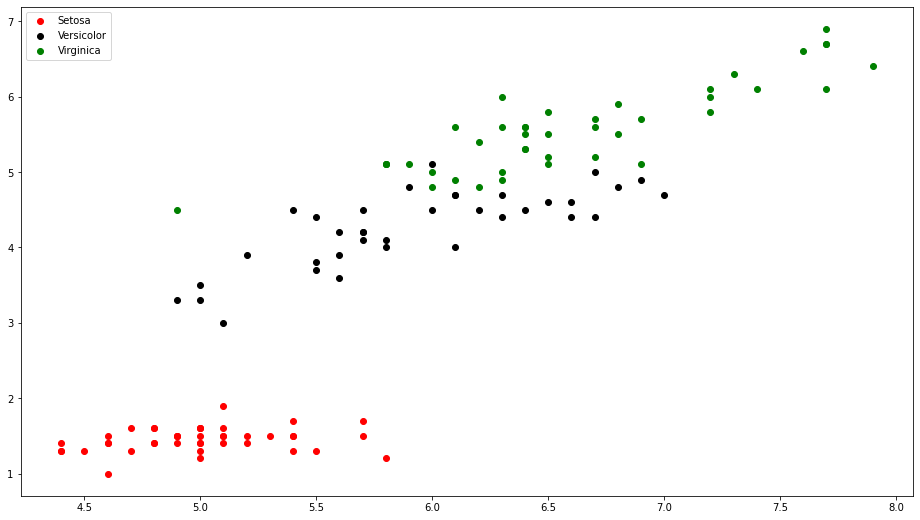

In [48]:
#graph training data

points = train.values.tolist()
answers = train_y.values.tolist()

setosa = []
versicolor = []
virginica = []

t = 0
for x in points:
    if answers[t] == 0:
        setosa.append(x)
    elif answers[t] == 1:
        versicolor.append(x)
    elif answers[t] == 2:
        virginica.append(x)
    else:
        print("Class out of range")
    t += 1

print(setosa)
setosa = np.array(setosa)
versicolor = np.array(versicolor)
virginica = np.array(virginica)
    
    
plt.figure(figsize=(16,9))
plt.scatter(setosa[:,0],setosa[:,1],color='red',label='Setosa')
plt.scatter(versicolor[:,0],versicolor[:,1],color='black',label='Versicolor')
plt.scatter(virginica[:,0],virginica[:,1],color='green',label='Virginica')
plt.legend()
plt.show()

In [46]:
dataset = [setosa, versicolor, virginica]


def kNN (dataset, predict, k=3):
    #check if k is more than amount of classes
    if len(dataset) > k:
        print("K is less than total classifiers!")
    
    distances = []
    
    groupNum = 0
    for Class in dataset:
        for point in Class:
            euclidean_distance = math.sqrt((point[0] - predict[0])**2 + (point[1]-predict[1])**2)
            distances.append([euclidean_distance, groupNum])
        groupNum += 1
    
    #sort to get closes distances and the the class of the closest three
    scored = sorted(distances)
    votes = []
    for x in scored[:k]:
        votes.append(x[1])
    
    #get most common vote
    #print(votes)
    nums = []
    groupNum = 0
    for x in range(len(dataset)):
        count = votes.count(groupNum)
        nums.append(count)
        groupNum += 1
    
    vote_result = max(votes)
    return vote_result

testPoints = test.values.tolist()
testAnswers = test_y.values.tolist()

corrects = 0
wrongs = 0

predictions = []
t = 0
for x in testPoints:
    result = kNN(dataset, x, 3)
    if result == testAnswers[t]:
        corrects += 1
    else:
        wrongs += 1
    t += 1
    predictions.append([x, result])
    print(t, end=" ")
    #print(result)

print()

print("Correct:", corrects)
print("Wrong:", wrongs)

print("accuracy:", corrects / (corrects + wrongs))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 
Correct: 29
Wrong: 1
accuracy: 0.9666666666666667


[[5.1, 1.7], [5.5, 1.4], [4.3, 1.1], [5.1, 1.4], [4.8, 1.9], [5.1, 1.5], [5.4, 1.7], [5.2, 1.5]]


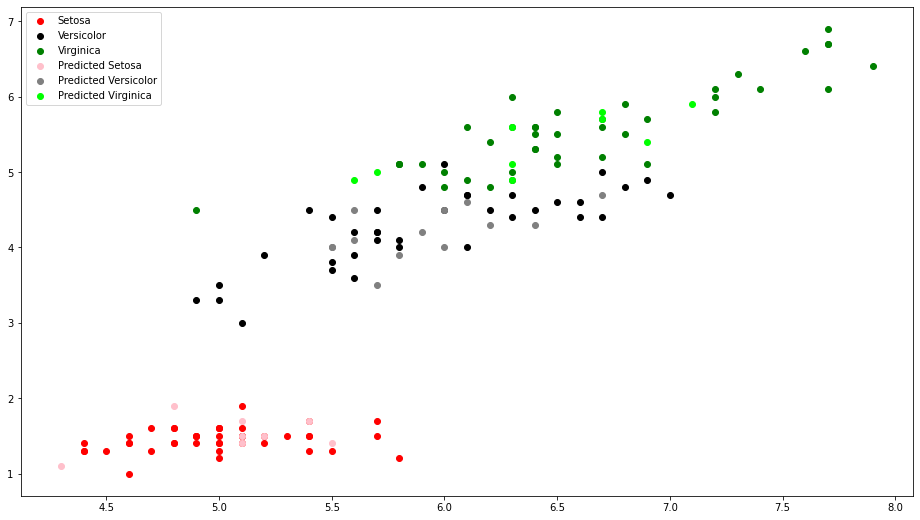

In [50]:
#create a complete graph with predicted data along with given data

predicted_setosa = []
predicted_versicolor = []
predicted_virginica = []

for x in predictions:
    if x[1] == 0:
        predicted_setosa.append(x[0])
    elif x[1] == 1:
        predicted_versicolor.append(x[0])
    elif x[1] == 2:
        predicted_virginica.append(x[0])
    else:
        print("Result out of class range")
print(predicted_setosa)
predicted_setosa = np.array(predicted_setosa)
predicted_versicolor = np.array(predicted_versicolor)
predicted_virginica = np.array(predicted_virginica)

plt.figure(figsize=(16,9))
plt.scatter(setosa[:,0],setosa[:,1],color='red',label='Setosa')
plt.scatter(versicolor[:,0],versicolor[:,1],color='black',label='Versicolor')
plt.scatter(virginica[:,0],virginica[:,1],color='green',label='Virginica')
plt.scatter(predicted_setosa[:,0],predicted_setosa[:,1],color='pink',label='Predicted Setosa')
plt.scatter(predicted_versicolor[:,0],predicted_versicolor[:,1],color='grey',label='Predicted Versicolor')
plt.scatter(predicted_virginica[:,0],predicted_virginica[:,1],color='lime',label='Predicted Virginica')
plt.legend()
plt.show()